
#### ORIGINAL DATA SOURCE:

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.

Acknowledgements
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

**Note: We will be dealing with real image files, NOT numpy arrays. Which means a large part of this process will be learning how to work with and deal with large groups of image files. This is too much data to fit in memory as a numpy array, so we'll need to feed it into our model in batches. **

In [117]:
import os

In [2]:
data_dir = 'C:\\Users\\u47000\\Desktop\\cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#this is going to allow us read image file diredtly
from matplotlib.image import imread

In [6]:
#setting two variables
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [7]:
test_path

'C:\\Users\\u47000\\Desktop\\cell_images\\test\\'

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path)

['parasitized', 'uninfected']

We're going to build a model that is based off the image of a cell. 

Can it predict whether or not it's infected or not infected?

In [10]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
para_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'
para_cell

'C:\\Users\\u47000\\Desktop\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [12]:
# automatically transforms png file into an array
imread(para_cell).shape

(148, 142, 3)

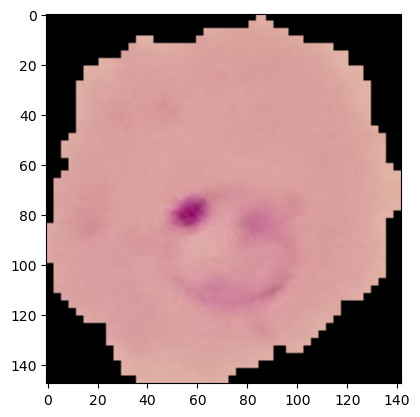

In [13]:
plt.imshow(imread(para_cell))

In [14]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [15]:
uninfected_cell = train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [16]:
imread(uninfected_cell).shape

(139, 160, 3)

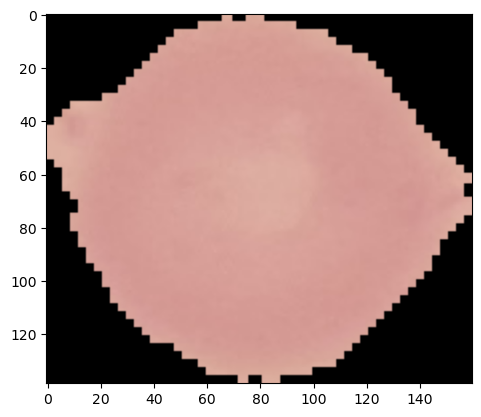

In [17]:
plt.imshow(imread(uninfected_cell))

In [18]:
#pwd

We have same amount of instances per class

In [19]:
len(os.listdir(train_path+'parasitized'))

12480

In [20]:
len(os.listdir(train_path+'uninfected'))

12480

In [21]:
len(os.listdir(test_path+'parasitized'))

1300

In [22]:
len(os.listdir(test_path+'uninfected'))

1300

In [23]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    
    img = imread(test_path+'uninfected\\'+ image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    

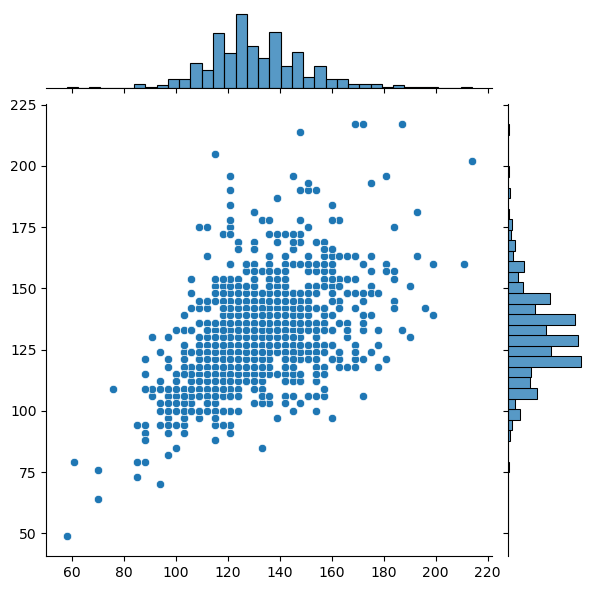

In [24]:
sns.jointplot(x = dim1, y = dim2);

Here, we can see that we have a small image that is 50/60 and really large image over 200/200.

Convolutional neural network isn't going to be able to train on images of various sizes. So, we need to resize all the images to be the same size.

So, we have to choose what actual dimension should we resize everything which is the **average of both dimesion**.

In [25]:
np.mean(dim1)

130.92538461538462

In [26]:
np.mean(dim2)

130.75

In [27]:
image_shape = (130,130,3)

For smaller images we will add padding and for larger images we will either crop or shrink

# Image Data Generator

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
# help(ImageDataGenerator)

In [41]:
# We would like to expand the amount of images without having to gather more data
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1, #this will shift the width of picture
                              height_shift_range=0.1,
                              shear_range=0.1,   #shear means cutting away part of the image
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest') 

Here we are using circular images so it can be streched or squished. However, If you are dealing with nice imageslike facial data, you don't want to be squeezing or rotating face in unrealistic positions. 

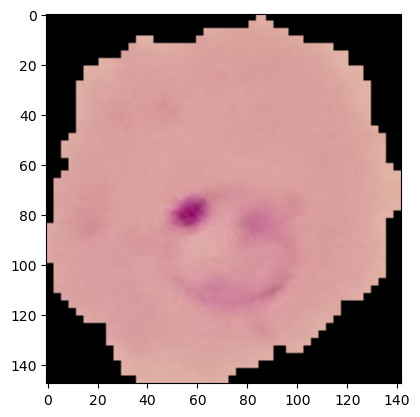

In [48]:
para_img = imread(para_cell)
plt.imshow(para_img)

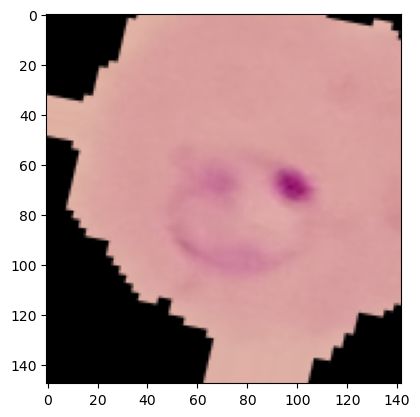

In [54]:
# Calling a single random transformation
# to do a bunch of random transformation based off the ristrictions that we set up above
plt.imshow(image_gen.random_transform(para_img))

### Setting up our directories to flow batches from a directory

In [56]:
train_path

'C:\\Users\\u47000\\Desktop\\cell_images\\train\\'

In [57]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [58]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Model

Model will be fitting to the generator

In [61]:
from tensorflow.keras.models import Sequential

In [63]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [64]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam',
             metrics = ['accuracy'])

In [68]:
#checking the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)       

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

In [71]:
early_stop = EarlyStopping(monitor = 'val_loss', patience=2)

In [72]:
# batch_size of 16 images at a time
batch_size = 16

In [73]:
# creating 2 generators 
# training image generator and test generator
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [74]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle=False)

Found 2600 images belonging to 2 classes.


In [75]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [76]:
results = model.fit_generator(train_image_gen, epochs = 20,
                             validation_data=test_image_gen,
                             callbacks = [early_stop])

C:\Users\u47000\AppData\Local\Temp\ipykernel_11376\1524811802.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen, epochs = 20,


Epoch 1/20
1560/1560 [==============================] - 578s 370ms/step - loss: 0.9456 - accuracy: 0.5495 - val_loss: 0.6709 - val_accuracy: 0.5865
Epoch 2/20
1560/1560 [==============================] - 401s 257ms/step - loss: 0.6751 - accuracy: 0.5864 - val_loss: 0.6663 - val_accuracy: 0.5973
Epoch 3/20
1560/1560 [==============================] - 400s 256ms/step - loss: 0.6717 - accuracy: 0.5960 - val_loss: 0.6635 - val_accuracy: 0.6112
Epoch 4/20
1560/1560 [==============================] - 399s 256ms/step - loss: 0.6738 - accuracy: 0.5851 - val_loss: 0.6630 - val_accuracy: 0.6062
Epoch 5/20
1560/1560 [==============================] - 398s 255ms/step - loss: 0.6635 - accuracy: 0.6099 - val_loss: 0.6760 - val_accuracy: 0.5923
Epoch 6/20
1560/1560 [==============================] - 397s 254ms/step - loss: 0.6643 - accuracy: 0.6101 - val_loss: 0.6665 - val_accuracy: 0.6100


In [85]:
from tensorflow.keras.models import load_model
model = load_model('malaria_detector.h5')
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000001A24A29E6E0>>

In [87]:
model.evaluate_generator(test_image_gen)

C:\Users\u47000\AppData\Local\Temp\ipykernel_11376\4011314882.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)


[36.52685546875, 0.8776922821998596]

In [88]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
model.metrics_names

['loss', 'accuracy']

# Evaluation

In [92]:
pred = model.predict_generator(test_image_gen)

Keep in mind, this usually takes a lot longer than a typical prediction because the generator has to actually go into your computer, read and open these image files and then feed them back into your model.

In [93]:
pred  # they are values between 0 and 1 i.e., returning back probabilities

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [95]:
predictions = pred > 0.5
predictions 

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

We're saying that if we're more than 50% sure that our prediction is infected, go ahead and label it as true.

In real world scenario, we may only want to  alert the doctor if we're 80% sure or something like that and have the doctor manually look at everything else.

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [98]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1300
           1       0.98      0.78      0.86      1300

    accuracy                           0.88      2600
   macro avg       0.90      0.88      0.88      2600
weighted avg       0.90      0.88      0.88      2600



In [99]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1276,   24],
       [ 291, 1009]], dtype=int64)

### Suppose we get a new png file from a doctor:

In [100]:
para_cell

'C:\\Users\\u47000\\Desktop\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [102]:
from tensorflow.keras.preprocessing import image

In [ ]:
type(image.load_img(para_cell))

In [106]:
my_image = image.load_img(para_cell, target_size=image_shape)

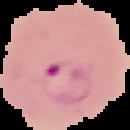

In [107]:
my_image 

In [110]:
# either train the mdoel or load the model that already exists
# model.summary()

In [112]:
# reading the image and passing it to model
my_img_arr = image.img_to_array(my_image)
my_img_arr.shape 
# I want it to be (1 ,130, 130, 3)
# 1 because model expects batches of images

(130, 130, 3)

In [113]:
# resizing it along the o dimension
my_img_arr = np.expand_dims(my_img_arr, axis = 0)

In [114]:
my_img_arr.shape

(1, 130, 130, 3)

In [115]:
model.predict(my_img_arr)

1/1 [==============================] - 0s 103ms/step


array([[0.]], dtype=float32)

In [116]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}